In [51]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import roc_auc_score,roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mfcc = pd.read_csv('mfcc_features.csv')
fbank = pd.read_csv('fbank_features.csv')
labels = pd.read_csv('labels_val.csv')

In [5]:
tmfcc = torch.from_numpy(mfcc.iloc[:, 2:].values).float().unsqueeze(0)
tfbank = torch.from_numpy(fbank.iloc[:, 2:].values).float().unsqueeze(0)
labels = np.array(labels['IS_LAUGHTER'])

In [150]:
from laughter_classification.rnn import TwoLossRNN
model = TwoLossRNN()
model.load_state_dict(torch.load('data/ckpt/model_2_14.pt'))
model.eval()

TwoLossRNN(
  (rnn1): LSTM(39, 64, num_layers=3, dropout=0.2)
  (rnn2): LSTM(128, 64, num_layers=3, dropout=0.2)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (out1): Linear(in_features=32, out_features=1, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (out2): Linear(in_features=32, out_features=1, bias=True)
)

In [151]:
out1, out2 = model(tfbank, tmfcc)

In [152]:
out2 = out2.detach().numpy()
out1 = out1.detach().numpy()
out1 = np.reshape(out1, -1)
out2 = np.reshape(out2, -1)

### Result metrics

In [153]:
print('accuracy: {}'.format(metrics.accuracy_score(labels, np.round(out1))))
print('auc: {}'.format(roc_auc_score(labels, out1)))

accuracy: 0.9673731874131378
auc: 0.8730563702289373


In [149]:
sum(np.logical_and(labels==1, out1 >= 0.5))

6558

In [ ]:
def plot_laugh(label, pred):
    l = len(pred)
    plt.plot(np.arange(l), pred, lw=3)
    plt.plot(np.arange(l), label, c='r',  ls='--')
    plt.hlines(0.5, 0, l, color='g', linestyles='dashed')

### Exapmple of true laughter intervals

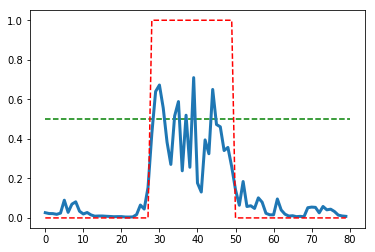

In [104]:
indx1 = np.arange(1500,1580)
plot_laugh(labels[indx1], out1[indx1])

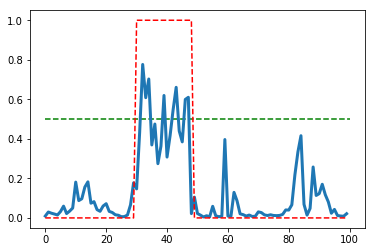

In [131]:
indx2 = np.arange(2600,2700)
plot_laugh(labels[indx2], out1[indx2])

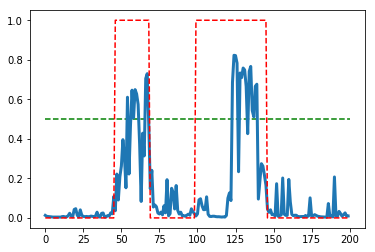

In [133]:
indx2 = np.arange(33800,34000)
plot_laugh(labels[indx2], out1[indx2])